<a href="https://colab.research.google.com/github/nacczevedo/pos_datascience_analytics/blob/main/MVP_Modelo_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pós-Graduação em Ciências de Dados e Analytics**

##**Sprint II**

##**MVP - Modelo A**

##**Aluna**: Nathalia Azevedo


**Modelo A**:  utilizando métodos clássicos para um problema de classificação ou regressão.
Você deverá treinar modelos clássicos de *machine learning*, iniciando na carga e preparação dos dados, incluindo a separação entre treino e teste, a seleção de atributos, transformação de dados, modelagem, otimização de hiperparâmetros, até a avaliação e comparação de resultados dos modelos treinados. É recomendado o uso de cross-validation e a criação de pipelines, conforme apresentado no material do curso.


# **Checklist sugerido:**

**Definição do Problema**

*Objetivo*: entender e descrever claramente o problema que está sendo resolvido.

*   Qual é a descrição do problema?
*   Você tem premissas ou hipóteses sobre o problema? Quais?
*   Que restrições ou condições foram impostas para selecionar os dados?
*   Descreva o seu dataset (atributos, imagens, anotações, etc).

**Preparação de Dados**

*Objetivo*: realizar operações de preparação dos dados.


*   Separe o dataset entre treino e teste (e validação, se aplicável).
*   Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
*   Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
*   Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.

**Modelagem e treinamento:**

*Objetivo:* construir modelos para resolver o problema em questão.

*   Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
*   Há algum ajuste inicial para os hiperparâmetros?
*   O modelo foi devidamente treinado? Foi observado problema de underfitting?
*   É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
*   Há algum método avançado ou mais complexo que possa ser avaliado?
Posso criar um comitê de modelos diferentes para o problema (ensembles)?

**Avaliação de Resultados:**

*Objetivo*: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

*   Selecione as métricas de avaliação condizentes com o problema, justificando.
*   Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.
*   Os resultados fazem sentido?
*   Foi observado algum problema de overfitting?
*   Compare os resultados de diferentes modelos.
*   Descreva a melhor solução encontrada, justificando.

# Modelo A - Vamos analisar os dados de UCI Long Beach Heart Disease.
(https://archive.ics.uci.edu/dataset/45/heart+disease)


A doença cardiovascular ou doença cardíaa é a principal causa de morte entre mulheres e homens e entre a maioria dos grupos raciais/étnicos nos Estados Unidos. A doença cardíaca descreve uma série de condições que afetam o coração. As doenças que fazem parte do grupo das doenças cardíacas incluem as doenças dos vasos sanguíneos, como a doença das artérias coronárias. Segundo o CDC, cerca de 1 em cada 4 mortes por ano deve-se a doenças cardíacas. A OMS afirma que o estilo de vida humano é a principal razão por detrás deste problema cardíaco. Para além disso, existem muitos fatores chave que alertam para o fato de a pessoa poder ou não ter a possibilidade de desenvolver uma doença cardíaca.

A partir deste conjunto de dadps, construí modelos de classificação. Dos 76 atributos existentes no dados, vamos utilizar os 14 atributos mais importante para análise referente a doenças cardiácas de 200 pacientes. Esses atributos foram pré-selecionados e disponibilizados em um banco de dados diferente pelo próprio site da UCI.



### Descrição dos atributos utilizados

      1. Age - idade
      2. Sex - sexo (1 = homem; 0 = mulher)
      3. cp - tipo de dor no peito
         Valor 1: angina típica
         Valor 2: angina atípica
         Valor 3: dor não anginosa
         Valor 4: assintomático
      4. trestbps - tensão arterial em repouso
        (em mm/Hg na admissão ao hospital)
      5. chol - colesterol sérico em mg/dl
      6. fbs - (glicemia em jejum > 120 mg/dl)
        (1 = true; 0 = false)
      7. restecg - resultados electrocardiográficos em repouso
         Valor 0: normal
         Valor 1: com anomalia da onda ST-T (T inversões de onda e/ou
                  elevação ou depressão de ST > 0.05 mV)
         Valor 2: com provável ou definitiva hipertrofia ventricular esquerda
      8. thalach - frequência cardíaca máxima atingida
      9. exang - angina induzida pelo exercício (1 = sim; 0 = não)
      10. oldpeak - Depressão ST induzida pelo exercício em relação ao repouso
      11. slope - a inclinação do segmento ST de pico do exercício
         Valor 1: inclinação ascendente
         Valor 2: reto
         Valor 3: inclinação descendente
      12. ca - número de vasos principais coloridos por fluroscopia (0-3)
      13. thal - 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
      14. num (o atributo previsto) - diagnóstico de doença cardíaca a partir do estado angiográfico da doença
          0 : Sem doença cardíaca; paciente saudável
          1-4 : Presença de doença cardíaca
             1 : Doença cardíaca leve
             2 : Doença cardíaca ligeiramente grave
             3 : Doença muito grave
             4 : Doença cardíaca possivelmente fatal

## Fazendo os imports necessários

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.metrics import confusion_matrix # para fazer matriz de confusão
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import GridSearchCV # para ajustar paramêtros automaticamente do modelo
from sklearn.metrics import accuracy_score # para exibição da acurácia do modelo
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier # Algoritmo de KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # Algoritmo de SVM
from sklearn.preprocessing import StandardScaler # função de pre processamento para padronizar
from sklearn.preprocessing import MinMaxScaler # função de pre processamento para normalizar

## Importando dados de uma URL para um dataframe

In [ ]:
# Url a importar
url = 'https://raw.githubusercontent.com/nacczevedo/pos_datascience_analytics/main/heart%2Bdisease/processed.va.data'

# Labels dos atributos do dataset
labels_atributos = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

# Carga do dataset através do csv
dataset = pd.read_csv(url, delimiter=',', names=labels_atributos, skiprows=0)

# Subtituindo os ? por 0
dataset=dataset.replace('?',0)

# Verifica o tipo de dado
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


Descreva o seu dataset (atributos, imagens, anotações, etc).


AQUI EDITAR

In [ ]:
# Exibe as 5 primeiras linhas
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0


## 3 - Preparação dos dados

Preparação de Dados

Objetivo: realizar operações de preparação dos dados.

Separe o dataset entre treino e teste (e validação, se aplicável).

Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.

Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.

Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.




In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [ ]:
# Vemos acima que no dataset temos colunas do tipo objeto e aqui transformamos para númerico
dataset = dataset.apply(pd.to_numeric)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int64  
 4   chol      200 non-null    int64  
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    int64  
 8   exang     200 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int64  
 11  ca        200 non-null    int64  
 12  thal      200 non-null    int64  
 13  num       200 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.0 KB


Text(0.5, 1.0, 'Distribuição da idade')

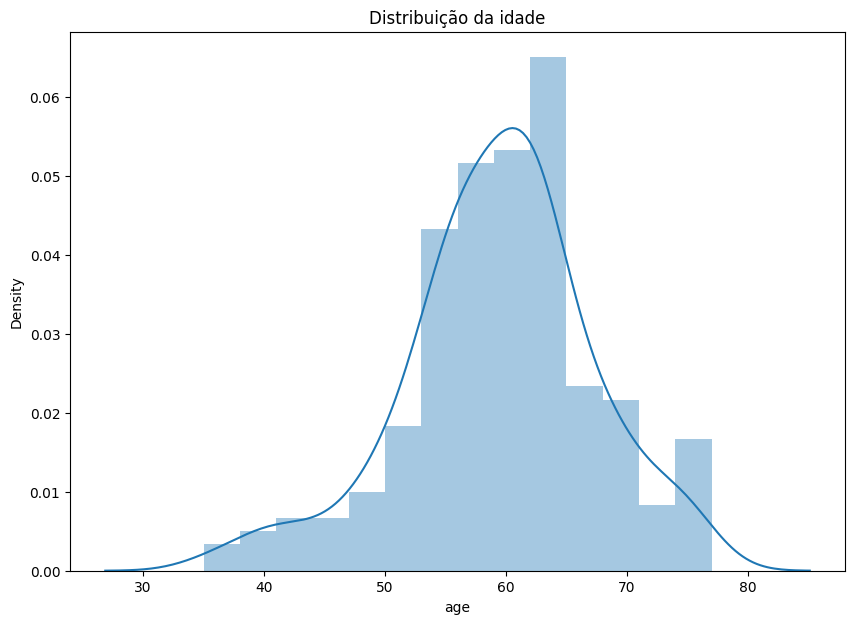

In [ ]:
## Visualização da distribuição de idade dos pacientes

#Código esta em seaborn, refazer para matplotlib

plt.rcParams['figure.figsize'] = (10, 7)
sns.distplot(dataset['age'])
plt.title('Distribuição da idade')

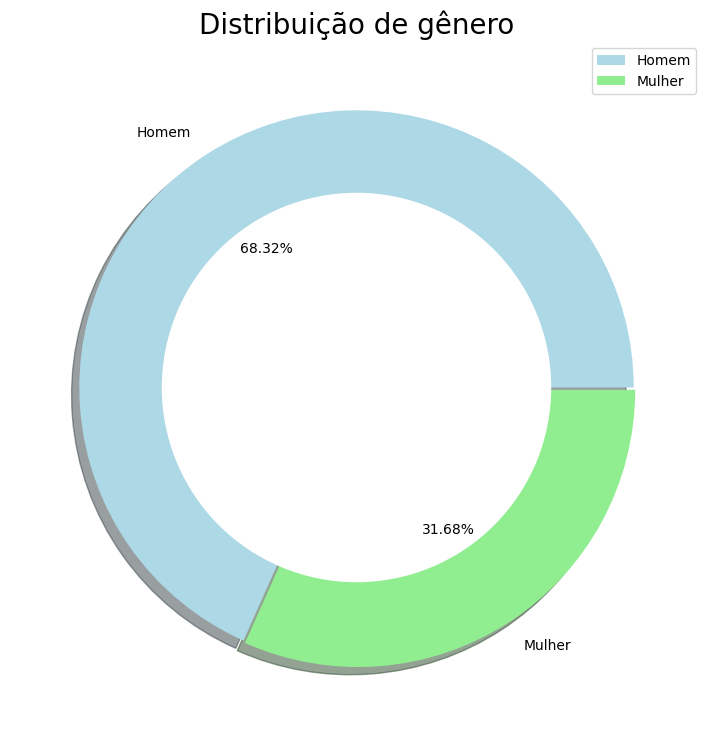

In [ ]:
# Visualização da distribuição de sexo dos pacientes

dataset['sex'].value_counts()

# plotting a donut chart for visualizing each of the recruitment channel's share

size = [207, 96]
colors = ['lightblue', 'lightgreen']
labels = "Homem", "Mulher"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribuição de gênero', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

<Axes: xlabel='num', ylabel='count'>

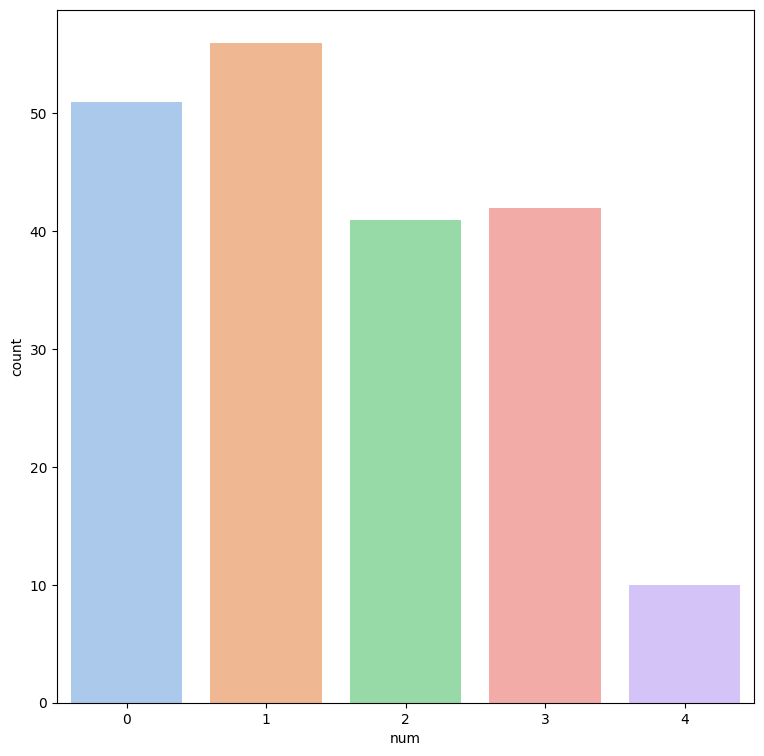

In [ ]:
# Plotando a distribuição das classes (gravidade da doença) de presença de doença cardíaca e sua gravidade
ax=sns.countplot(x="num", data=dataset, palette = 'pastel')
ax

Text(0.5, 1.0, 'Relação da pressão arterial com a gravidade da doença')

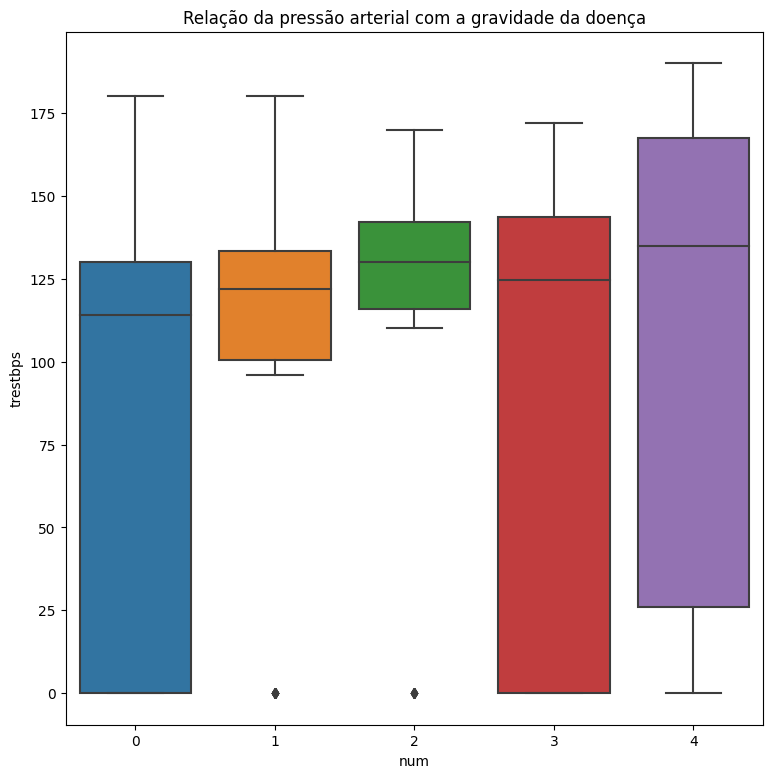

In [ ]:
# Relação da gravidade da doença com pressão arterial em repouso (atributo tresbps)

sns.boxplot(x="num", y="trestbps", data=dataset)
plt.title('Relação da pressão arterial com a gravidade da doença', fontsize = 12)

Text(0.5, 1.0, 'Relação entre o colesterol e a gravidade da doença')

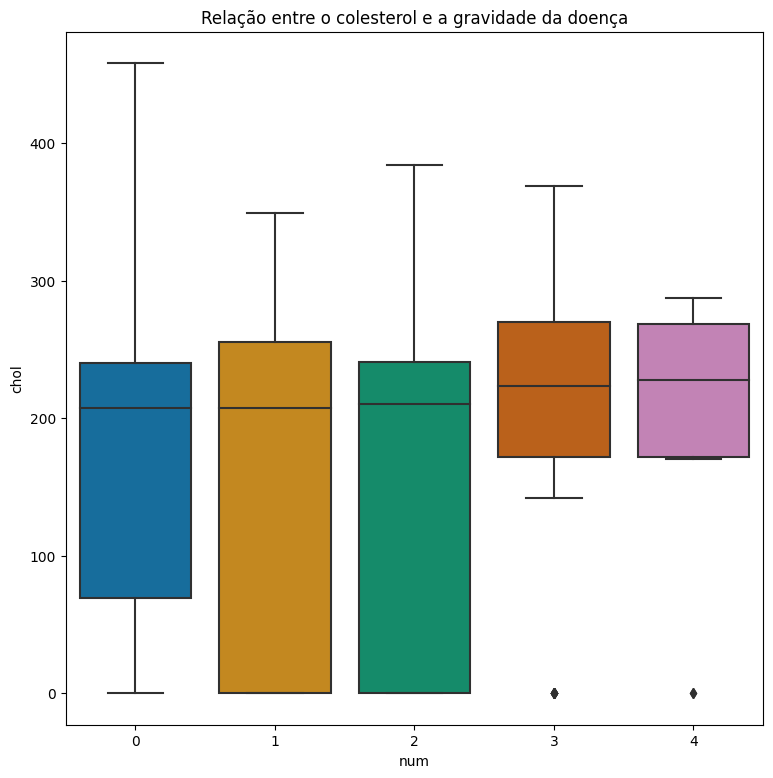

In [ ]:
# Relação colesterol vs gravidade da doença

sns.boxplot(data=dataset, x='num', y='chol', palette = 'colorblind')
plt.title('Relação entre o colesterol e a gravidade da doença', fontsize = 12)

Text(0.5, 1.0, 'Relação Eletrocardiografia vs gravidade da doença')

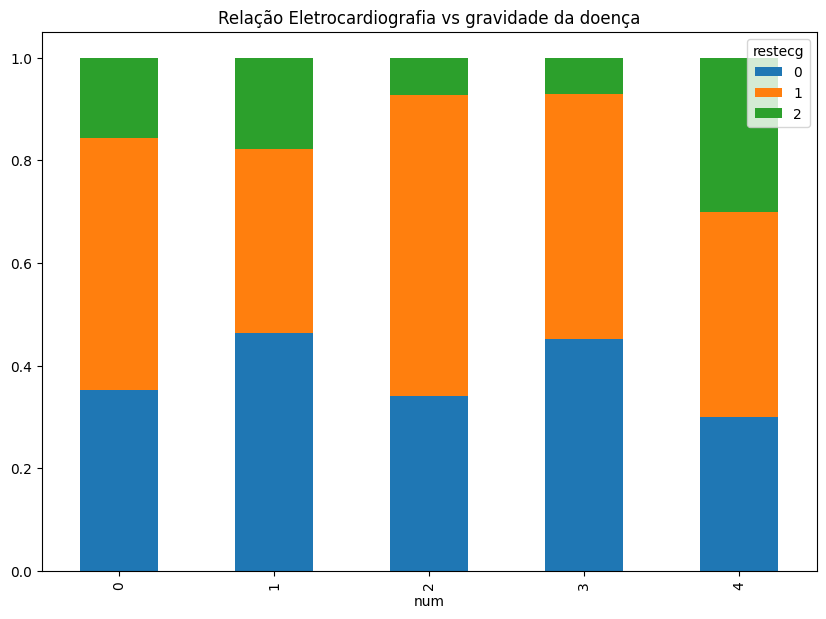

In [ ]:
# Relação Eletrocardiografia vs gravidade da doença

dat = pd.crosstab(dataset['num'], dataset['restecg'])
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))
plt.title('Relação Eletrocardiografia vs gravidade da doença', fontsize = 12)


Text(0.5, 1.0, 'Relação entre frequência cardíaca máxima e a gravidade da doença')

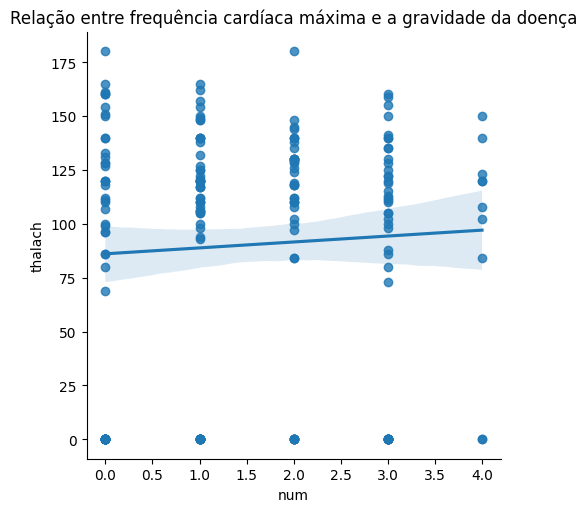

In [ ]:
# Checando a relação entre thalach (frequência cardíaca máxima atingida) e a gravidade da doença

plt.rcParams['figure.figsize'] = (10, 7)
sns.lmplot(data = dataset, x='num', y='thalach')
plt.title('Relação entre frequência cardíaca máxima e a gravidade da doença', fontsize = 12)

Text(0.5, 1.0, 'Nível de Angina vs gravidade da doença')

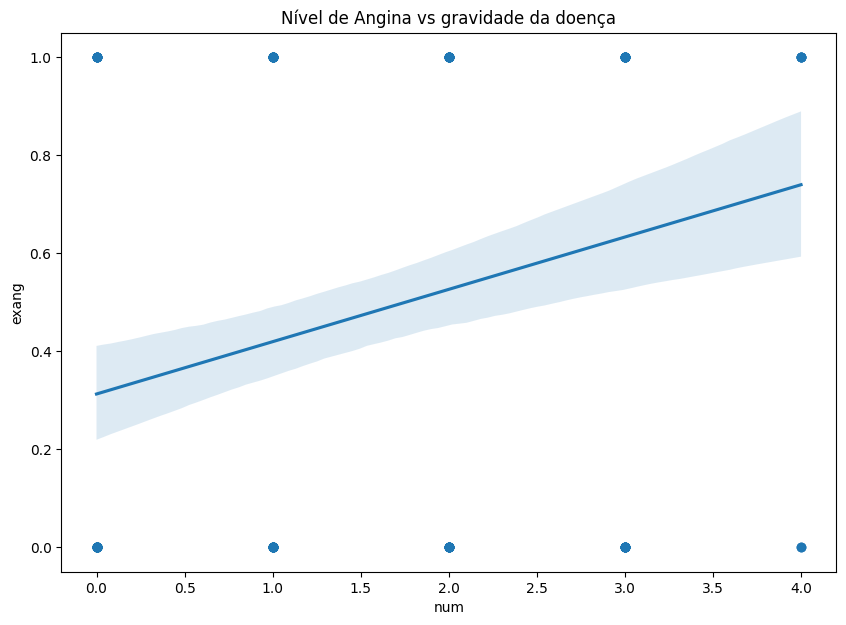

In [ ]:
# exang: Exercise induced angina (1 = yes; 0 = no)

sns.regplot(data = dataset, x='num', y='exang')
plt.title('Nível de Angina vs gravidade da doença', fontsize = 12)

Text(0.5, 1.0, 'Relação entre Frequência cardíaca máxima e a gravidade da doença')

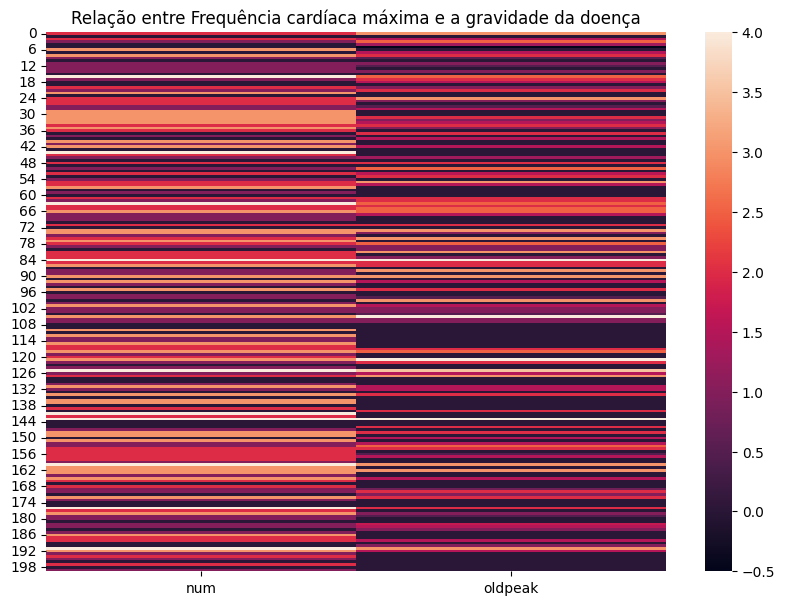

In [ ]:
# oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)kkk. . .

plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(dataset[['num', 'oldpeak']])
plt.title('Relação entre Frequência cardíaca máxima e a gravidade da doença', fontsize = 12)

Text(0.5, 1.0, 'Relação entre o pico do exercício e a gravidade da doença')

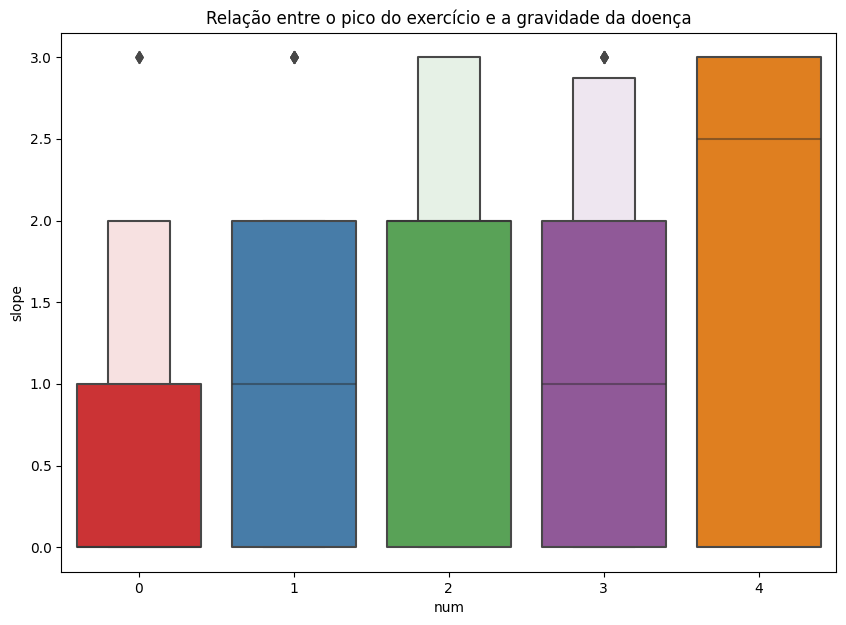

In [ ]:
# Relação entre o pico do exercício e a gravidade da doença


sns.boxenplot(data=dataset, x='num', y='slope', palette = 'Set1')
plt.title('Relação entre o pico do exercício e a gravidade da doença', fontsize = 12)

Text(0.5, 1.0, 'Relação entre os principais vasos e a gravidade da doença')

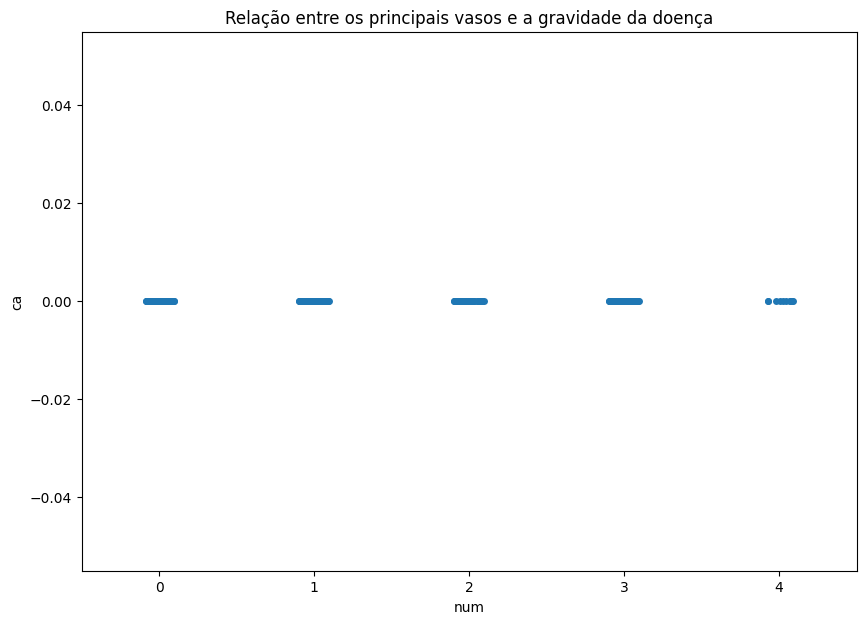

In [ ]:
#ca: The number of major vessels (0-3)

sns.stripplot(data=dataset, x='num', y='ca')
plt.title('Relação entre os principais vasos e a gravidade da doença', fontsize = 12)

Text(0.5, 1.0, 'Relação entre a idade e a gravidade da doença')

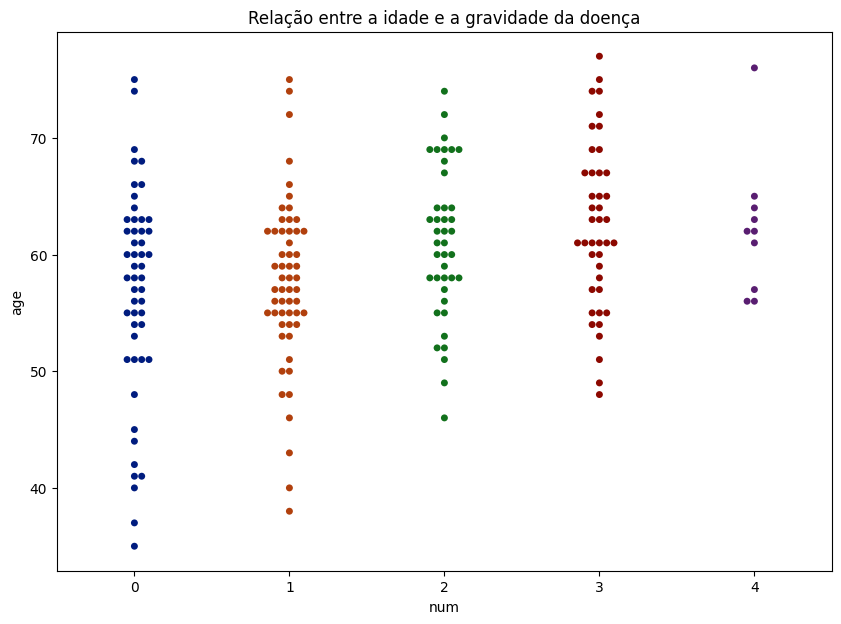

In [ ]:
# relation between age and target

sns.swarmplot(data=dataset, x='num', y='age', palette = 'dark')
plt.title('Relação entre a idade e a gravidade da doença', fontsize = 12)

In [ ]:
# Definindo as colunas que são de atributos formando o conjunto X
# E qual a coluna indica a classe, formando o conjunto y
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (coluna num)

# Separação em bases de treino e teste (holdout)
# 80% dos dados para treino e 20% para teste

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True, random_state=10)

# Definição de parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=10)

# Checando as dimensões
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Checando tipo do dado
print(type(X_train))

(160, 13) (160,) (40, 13) (40,)
<class 'numpy.ndarray'>


##Aplicar na avaliação dos modelos pelo menos 3 visões do dataset:

1. dados originais
2. dados normalizados
3. dados padronizados (utilizar pipelines)


**Analisar qual conjunto DADO x MODELO tem melhor avaliação para então treinar e aplicar ao conjunto todo!**

# 4 - Modelagem

## 4.1 - Com Dados Originais

KNN: 0.31 acurácia com desvio padrão de 0.19
CART: 0.33 acurácia com desvio padrão de 0.10
SVM: 0.30 acurácia com desvio padrão de 0.10
NB: 0.12 acurácia com desvio padrão de 0.08


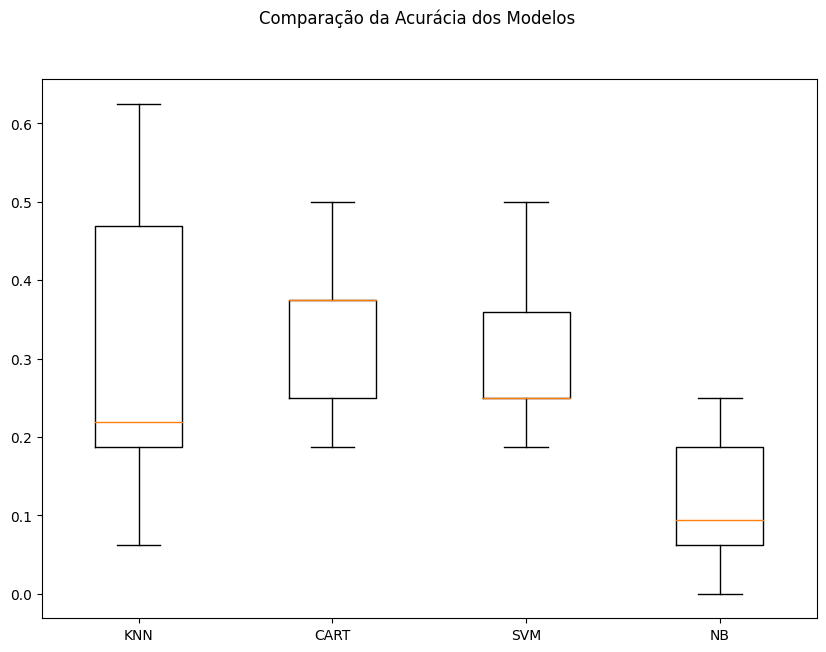

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  # imprime média e desvio padrão dos 10 resultados da validação cruzada para os 4 modelos
  msg = "%s: %0.2f acurácia com desvio padrão de %0.2f" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 4.2 - Criação e Avaliação de Modelos com dados padronizados e normalizados

KNN-orig: 0.31 de acurácia com desvio padrão de 0.19
CART-orig: 0.33 de acurácia com desvio padrão de 0.10
NB-orig: 0.12 de acurácia com desvio padrão de 0.08
SVM-orig: 0.30 de acurácia com desvio padrão de 0.10
KNN-padr: 0.27 de acurácia com desvio padrão de 0.13
CART-padr: 0.32 de acurácia com desvio padrão de 0.08
NB-padr: 0.11 de acurácia com desvio padrão de 0.05
SVM-padr: 0.30 de acurácia com desvio padrão de 0.18
KNN-norm: 0.31 de acurácia com desvio padrão de 0.16
CART-norm: 0.33 de acurácia com desvio padrão de 0.09
NB-norm: 0.11 de acurácia com desvio padrão de 0.05
SVM-norm: 0.29 de acurácia com desvio padrão de 0.15


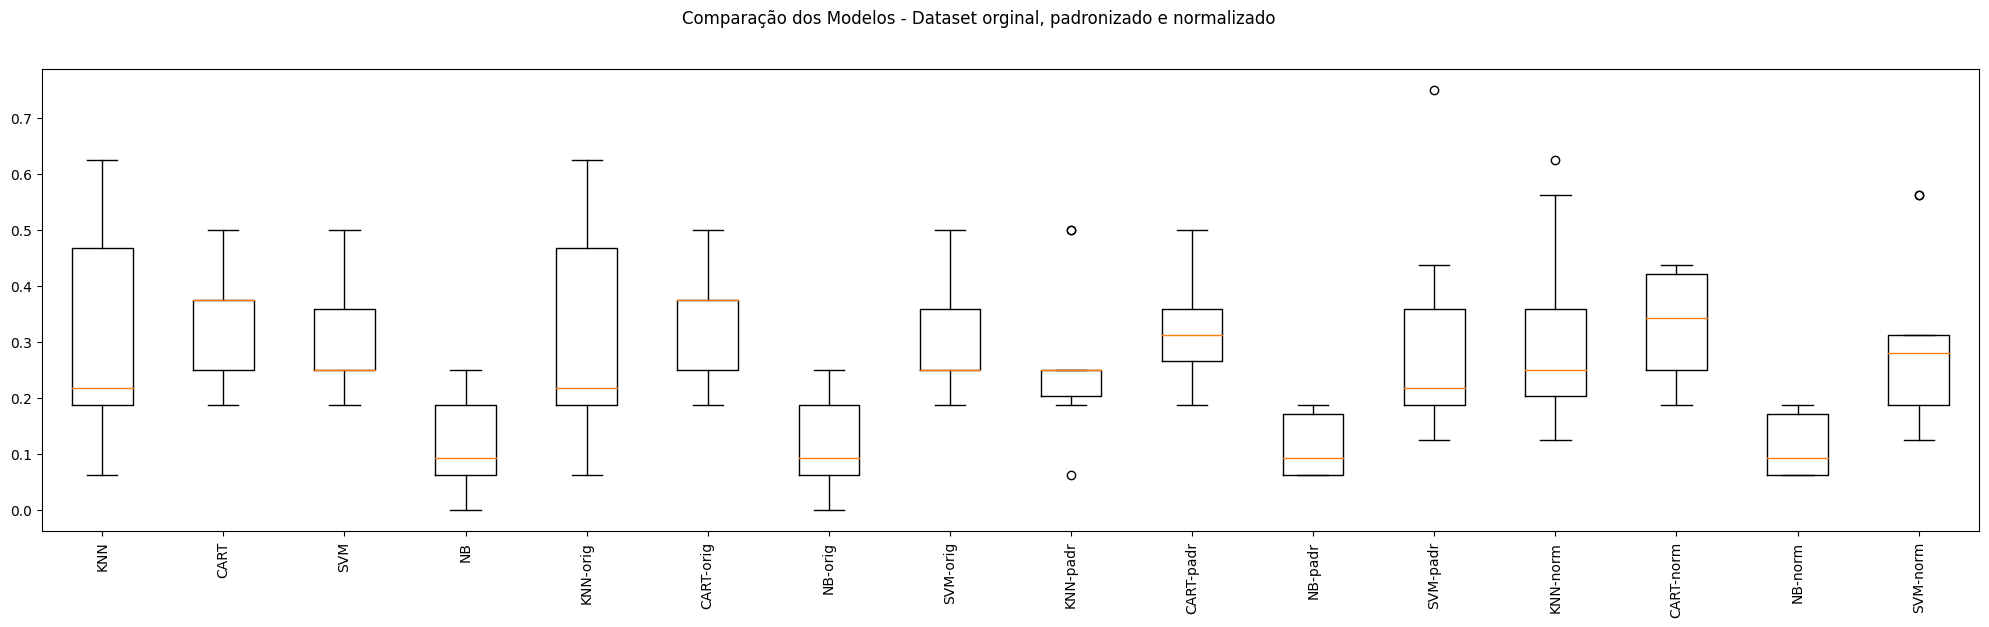

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results_pn = []
names_pn = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
svm = ('SVM', SVC())
naive_bayes = ('NB', GaussianNB())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f de acurácia com desvio padrão de %.2f" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor configuração: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor configuração: 0.331250 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-padr - Melhor configuração: 0.343750 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-norm - Melhor configuração: 0.381250 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}


## Finalização do modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(n_neighbors=19, metric='euclidean')
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.325


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)